# NMR Magnet Instability Spring 2024

In the fall I found that the compression trimmer adjustment screws in the PS-2 NMr head were strongly magnetic and replaced them with extremely low magnetic stainless-steel screws. This improved the T2* of the PS-2 system to several milli-seconds. As I will show later, there are still signs of non-exponential behavior (probably bi-exponential) but the improvement is strong. 

At that time I built tools to characterize the power-supply instability by recording a long string of FIDs using a LabJack U6-Pro and then fitting each FID to obtain the Larmor frequency as a function of time.

Here is a plot from last fall taken with the old switching power supply.

<img src="FID100sWarmF23.png" alt="FID Frequencies Fall 2023" />

Here we see that there is a pseudo-periodic wobble at the 1 kHz level with rapid excursions ranging over about 4 kHz width. This made it very hard to see kHz level features.

This semester we obtained a second hand Agilent 6572A linear power supply to replace the Lambda switcher. I have repeated the drift measurement with the new power supply and found the following frequency data.

<img src="Frequencies100s.png" alt="FID Frequencies Fall 2024" />

The improvement is considerable. Apart from the noise spike at about 25s, the combined noise and drift are confined to about a 200 Hz range with the 10s noise being commonly at about the 100 Hz level, more than a factor of 10 better than was possible with the switching power supply.

To study long-term drift I took another 10 s of data about 2-3 hours after the first set and found that the center frequency had drifted to about 3100 Hz (about 1 kHz/Hr drift) and the noise was still in the 100-200 Hz range.

The new supply and the new screws have made it possible to observe the chemical shift splitting of <200 Hz in toluene.

## Mineral Oil FID

With a very small mineral oil sample I get a rather small signal FID (about 1 V out for new max amplifier gain) that looks pretty exponential to the eye but that does not at all fit well to a single exponential. The simple T2* is about 3-4 ms.

<img src="MinOilFID.png" alt="Single Oil FID Fall 2024" />

Because we have the data for the FID we can do a little more analysis. Let's start with an FFT.

In [2]:
import numpy as np

fid_stream = np.loadtxt('MinOilFID.txt')

2401


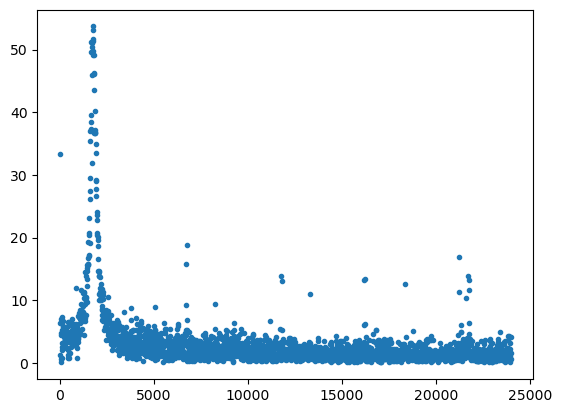

In [7]:
import matplotlib.pyplot as plt

fidt = fid_stream[0, :]
fidv = fid_stream[1, :]

freq_amps = np.fft.rfft(fidv)
nfreq = freq_amps.shape[0]
print(nfreq)
freqs = np.linspace(0, 1/(fidt[2]-fidt[0]), num=nfreq)

plt.plot(freqs, np.absolute(freq_amps), '.')

So all the interesting info is below 5 kHz. Let's filter out the high frequencies and reconstruct.

In [20]:
low_pass = 1.0 / np.sqrt(1 + (freqs / 3000)**6)

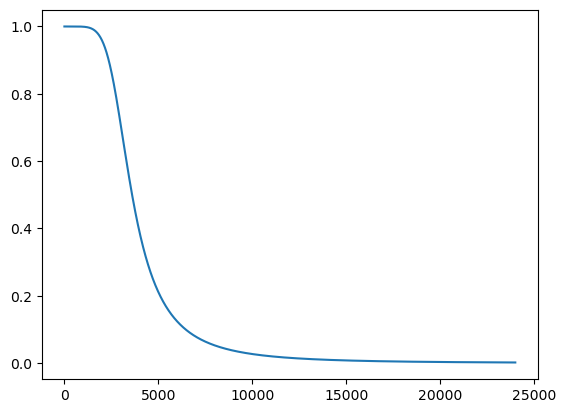

In [21]:
plt.plot(freqs, low_pass)

In [22]:
filt_amps = freq_amps * low_pass

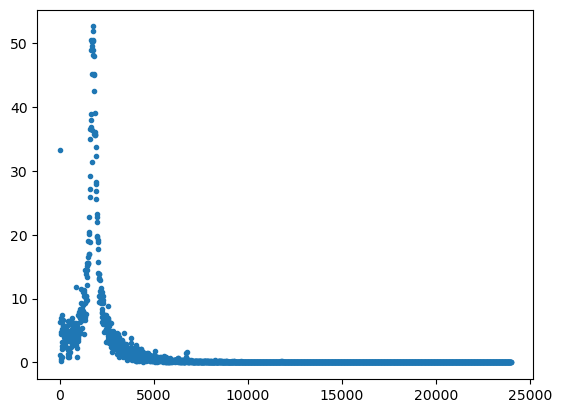

In [23]:
plt.plot(freqs, np.absolute(filt_amps), '.')

And back in normal space.

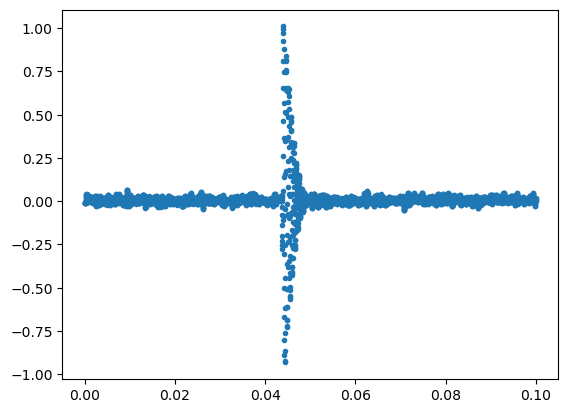

In [24]:
recon = np.fft.irfft(filt_amps, len(fidv))
plt.plot(fidt, recon, '.')

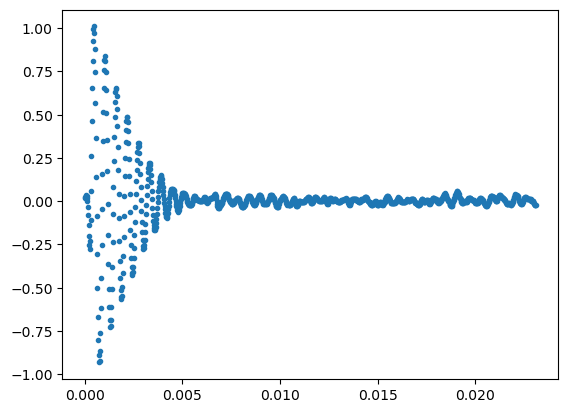

In [25]:
plt.plot(fidt[2090:3200]-fidt[2090], recon[2090:3200], '.')

So now it looks like a rapid spin down with some kind of tail that lasts about 20 ms and has hints of beating in it.

Let's blow up the main peak of the spectrum.

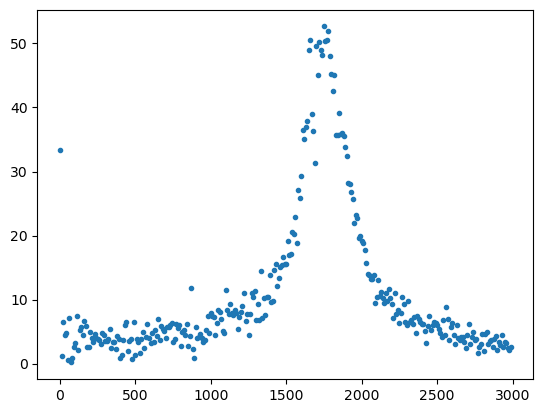

In [27]:
nmax = 300
plt.plot(freqs[:nmax], np.absolute(filt_amps)[:nmax], '.')

Hm, there are hints of a couple of frequencies about 6 frequency channels apart.

In [29]:
print(freqs[1]-freqs[0], freqs[5]-freqs[0])

9.997916666666665 49.98958333333333


So hints of two frequencies about 50 Hz apart. The sample is quite small, no more than 2-3 mm tall in the bottom of the sample tube, so inhomogeneity seems a bit unlikely to be the cause. Could it be indications of chemical shifts in the mineral oil sample?

Maybe not. 20 ms is the period of a 50 Hz signal. Maybe all we are seeing is a the finite width of the peak set by the finite width of the data!

# Water FID

I reduced the T1 of water by adding a small amount of dilute $CuSO_4$ to high purity water and put about 4 mm in a sample tube. The signal is much stronger than from the tiny mineral oil sample and it is much more like a single exponential. I still get a T2* of 2.9 ms but there are now no signs of beats and the tail takes 15-20 ms to die away completely. Here are the fit data.

<img src="CuFID.png" alt="Water plus CuSO4 FID Fall 2024" />

Again, we can pull out the Fourier transform.

600


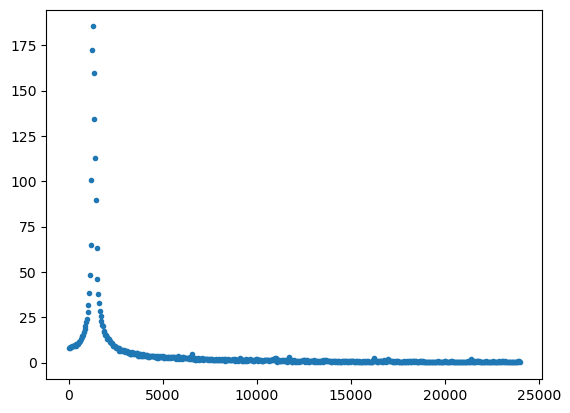

In [31]:
fid_streamc = np.loadtxt('CuFID.txt')
fidtc = fid_streamc[0, :]
fidvc = fid_streamc[1, :]

cu_amps = np.fft.rfft(fidvc)
nfreqc = cu_amps.shape[0]
print(nfreqc)
freqsc = np.linspace(0, 1/(fidtc[2]-fidtc[0]), num=nfreqc)

plt.plot(freqsc, np.absolute(cu_amps), '.')

and this time, if we blow up the peak, we get

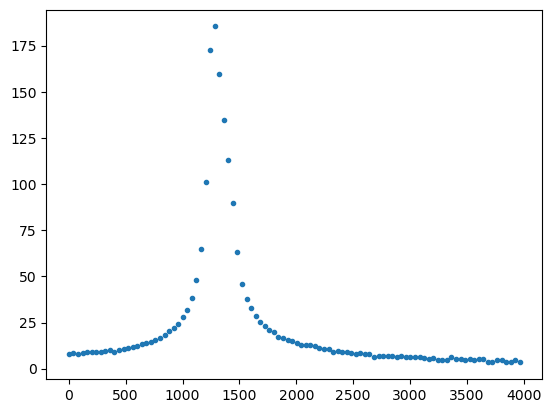

In [34]:
cnmax = 100
plt.plot(freqsc[:cnmax], np.absolute(cu_amps)[:cnmax], '.')

where, as expected, there is no sign of width to the peak beyond that set by T2*. This seems to me strong evidence for a chemical shift in mineral oil!!!

## FID Averaging

In order to do a better job of averaging I used my *longscan.py* program to record 20 s of FIDs at 5 pulses/second. I saved the full pulse data and found the frequency of each FID as shown in the plot below.

<img src="CuFIDFreq20sWARM.png" alt="Cu/Water FID stream 20s" />

To my eye there is a nice set of scans near 1400 Hz center frequency so I first counted all the FIDs with center frequencies between 1400 Hz and 1420 Hz inclusive (17) and then summed those 17 FIDS to get the next figure.

<img src="CuFIDAvg17.png" alt="Water plus CuSO4 avg of 17 FIDs" />

While it looks somewhat multi-exponential it clearly goes on for quite a long time. To see just how long I plotted the absolute values on a log10 scale.

<img src="CuFIDAvg17Log.png" alt="Water plus CuSO4 17 FID average on log10 scale" />

The total time is about 20 ms and the signal is pretty well clear of the noise for at least 15 ms. There is a strong sense of an average decay rate of 2 decades in 15 ms but there is clearly a coherent wobble about that average rate. I have looked at the Fourier transform of the average and see nothing that I can relate to that tiny wobble.

## Back to Mineral Oil

The mineral oil data were pulled from a single FID. I used the frequency selective averaging process to redo the Mineral oil data (though from a larger sample because I couldn't find the small one) and got a spectrum that is basically identical to the water one.

I think that I must have caught the original sample during one of the infrequent periods of rapid change in field. I no longer see any sign of beating.

## Toluene

Toluene shows clear beating in a single shot so let's see what we see in the average. It takes longer because the T1 is out near 1 s. Here is the result of averaging the 47 pulses with Larmor frequencies between 700 Hz and 720 Hz captured from about 200 s of data.

<img src="TolFIDAvg47.png" alt="Toluene 47 FID average" />

and here is the resulting spectrum, showing two clearly different Larmor frequencies.

<img src="TolFIDAvgSpect.png" 
alt="Toluene 47 FID average spectrum" />